<a href="https://colab.research.google.com/github/MUMADE-TADM/s1_python-rdvicen1/blob/main/k_means_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means
Dado un conjunto $X=\{e_1,\dots,e_m \}$

Encontrar una K-partición o conjunto de centroides $Centroides=\{ \mu_1,\ldots,\mu_k \}$

Tal que hace mínimo $\sum^m_{i=0}min_{\mu_j \in Centroides} (|| e_i -\mu_j||^2)$

que sea minimo disntancia con centroidos

## Algoritmo Paso a Paso

import random para numeros aleatorios

np numpy, pd pandas, plt matplotlib

de sklearn->  make_blobs

control+m para ejecutar todo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random 

Definir tamaño para pintar para utlizar matplotlib

In [ ]:
plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

Generamos datos 1500 sintéticos con 3 distribuciones gausianas aleatorias y los mostramos

data frame = matriz de columna y filas, se usa panda

random_stat = 170, semilla aleatoria para reproducir ejemplo


Valores de x posicion, valores de y clase a la que pertenece

para pintarlo x.loc[:,0] (:)todas las filas de la columna 0 y con :,1 todas las filas de la columna 1.

loc hace refencia a partes del dataframe. 



Text(0.5, 1.0, 'Datos Iniciales')

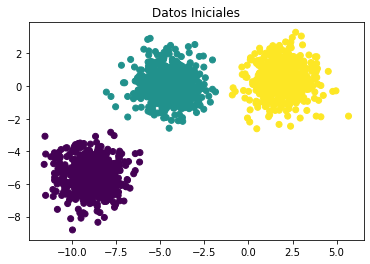

In [ ]:
n_samples = 1500
random_state = 170
x, y = make_blobs(n_samples=n_samples, random_state=random_state)
X=pd.DataFrame(x)
plt.scatter(X.loc[:, 0], X.loc[:, 1], c=y)
plt.title("Datos Iniciales")

###Inicialización

Generamos los primeros **Centroides** aleatorios

X son los centroides

random.random porque primer random es nombre libreria, segundo es funcion random

se define K=3

se generan con random, K = n. centroides, 2 dimensiones; comprendidas entre 20 y -10

marker=x para que centroide salga como x, plt.scatter centroides para que nos lo ponga de color

[[ 2.27392122  2.72675302]
 [-8.9603963   2.0006194 ]
 [ 7.51892866  5.79365465]]


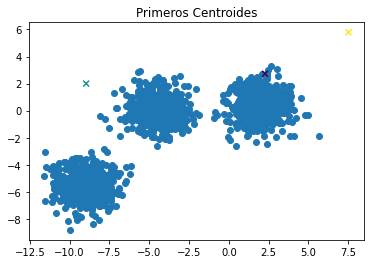

In [ ]:
K=3
Centroides=np.random.random((K,2))*20.0-10.0
plt.scatter(X.loc[:, 0], X.loc[:, 1])
plt.scatter(Centroides[:,0], Centroides[:,1], marker='x',c=[0,1,2])
plt.title("Primeros Centroides")
print(Centroides)

Definimos la métrica $||x-\mu||^2$ entre el centroide y los puntos para seleccionar el centroide más cercano para cada punto
como la distancia euclídea entre el punto en dos dimensiones $x=(x_0,x_1)$ y el centroide $\mu=(\mu_0.\mu_1)$

$d(x,\mu)=\sqrt{(x_0 - \mu_0)^2+(x_1 - \mu_1)^2}$

Se hace funcion distancia

arr es la funcion

nos interesa la menor de las distancia respector al centroide

Funcion np.where devuelve el centroide que esta mas cerca del centroide

In [ ]:
def distancia(X1,C):
  # C es el vector de Centroides
  #X1 es el punto
  # Construimos el vector de distancias del punto a cada centroide
  arr=[(sum((X1 - c)**2))**0.5 for c in C]
  #seleccionamos el índice (identificador del centroide) de mínimma distancia y los devolvemos
  return np.where(arr == np.amin(arr))[0][0]

Para todos los puntos calculamos cual es su centoide más cercano

apply aplica a cada fila del df la funcion que indica, en este caso la funcion distancia

la funcion distancia 2 datos: parametros y centroide, apply lo aplica a ambos

se le incorpor una columna c donde aparecen los centroides que tienen que aparecer

In [ ]:
X['C']=X.apply(distancia,axis=1,C=Centroides)

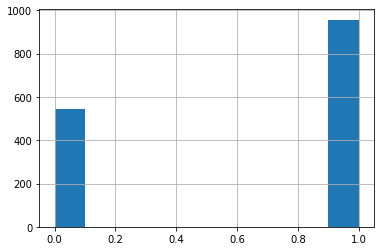

In [ ]:
X['C'].hist()

**probema hay menos centroides**

Si longitud de c es < que longitud de centroido es que falta uno

### Recálculo de los nuevos centroides

Con esta funcion if hace que no falte ningun centroide

simplemente hemos metido el centroide, no hemos echo ninguna agrupacion todavia

[[ 1.54005663  0.37787334]
 [-6.92634569 -2.85067538]
 [ 3.10828648 -5.86342906]]


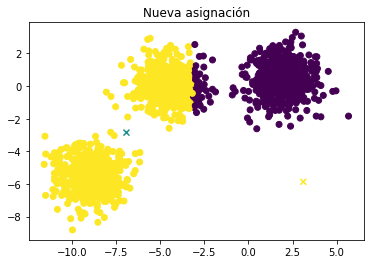

In [ ]:
C=X.groupby(['C']).mean().values
if(len(C)<len(Centroides)):
  C=np.vstack([C,np.random.random((len(Centroides)-len(C),2))*20.0-10.0])
plt.scatter(X.loc[:, 0], X.loc[:, 1],c=X['C'])
plt.scatter(C[:,0], C[:,1], marker='x',c=[0,1,2])
plt.title("Nueva asignación")
print(C)

### **(A)** Reaguste de los datos con los nuevos centroides

se repite paso 1, volver  a usar apply

In [ ]:
X['C']=X.iloc[:,:-1].apply(distancia,axis=1,C=C)

### **(B)** Recáculo de los nuevos centroides

In [ ]:
C1=X.groupby(['C']).mean().values
if(len(C1)<len(Centroides)):
  C1=np.vstack([C1,np.random.random((len(Centroides)-len(C1),2))*20.0-10.0])


[[ 1.54924293  0.42215596]
 [-6.91387122 -2.86892335]
 [-1.78732136  9.00604274]]


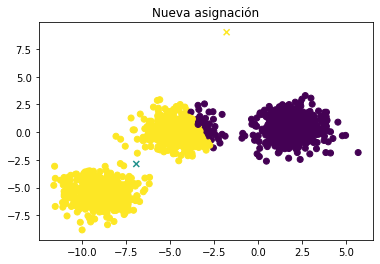

In [ ]:
plt.scatter(X.loc[:, 0], X.loc[:, 1],c=X['C'])
plt.scatter(C1[:,0], C1[:,1], marker='x',c=[0,1,2])
plt.title("Nueva asignación")
print(C1)

In [ ]:
diferencia=np.amax(abs(C-C1))
print(C)
C=C1
print(diferencia)
print(C)

[[ 1.54005663  0.37787334]
 [-6.92634569 -2.85067538]
 [ 3.10828648 -5.86342906]]
14.869471799528288
[[ 1.54924293  0.42215596]
 [-6.91387122 -2.86892335]
 [-1.78732136  9.00604274]]


diferencia que hay entre los 2 centroides que tenemos

2.99(lo que esta entre las matrices) es el maximo de la diferencia de la media entre todos los centroides 

Si la diferencia entre los nuevos centrodes C1 y los antíguos no es la adecuada volver a **(A)**

# Sciki-Learn [K-Mean](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

link con todas la formulas de kmean

init puedes indicar donde iniciar, por si el modelo se atasca en un punto

init: kmean++ hace una inspeccion de datos para encontrar una distribucion que tiene mas o menos los datos, y apartir de ahi obtiene un centroido que se separe el maximo entre ellos y asi cappture el maximo de datos

Contiene toda la libreria de python(tiene pagina web)

ajusta con m.fit

replica con m.pred

## Ejemplo

2 lineas nuevas, que nos indica que tipo de modelos quiero utilizar

from sklearn.cluester(zona cluster) coger kmeans

form sklear.datasets(zona datasets)

In [ ]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

<Figure size 864x864 with 0 Axes>

Resultado una vez hecho el modelo completo

Kmeans, con 3 cluster(3 clases), estado inicial random -> modelo KM

Despues **ajustar** = fit_predict(X) x que hemos cogido, (puntos x e y que hemos generado.



Aqui no se divide en test o train, ya que lo quieres hacer en tu modelo

Text(0.5, 1.0, 'Resultados')

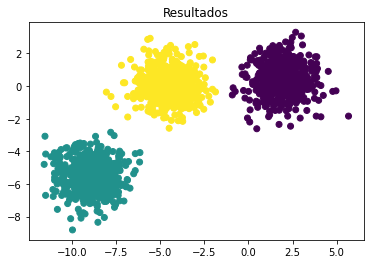

In [ ]:
KM= KMeans(n_clusters=3, random_state=random_state)
y_pred=KM.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Resultados")

**Atributos** del Objeto K-means

|Attributo|Significado|
|---------|-----------|
|**cluster_centers**| Coordenadas de los centroides|
|**labels**|Grupo de cada punto|
|**inertia**| Suma de los cuadrados de los puntos de cada grupo a su centroide|
|**n_iter**| Número de iteraciones|


In [ ]:
print(KM.cluster_centers_)

[[ 1.91176144  0.40634045]
 [-8.94137566 -5.48137132]
 [-4.55490993  0.02920864]]


## Pasaje del Titatic

In [ ]:
%cd /content/drive/My Drive/sesion5/k-means

[Errno 2] No such file or directory: '/content/drive/My Drive/sesion5/k-means'
/content


panda y matplot que vamos a utilizar

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

Leer los datos del pasaje del fichero titanic.csv mediante **pd.load_csv()**

se lee el fichero del titanic

panda para leer fichero

3 puntitos y copiar ruta(titanic.csv)

dataframe con nombre titanic

segunda linea, selecciona años y coste del pasaje; copy(deep) copia profunda de esos datos, es decir que se obtiene otro dataframe(cluster_data) solo con esas 2 columnas

3. se quitan nas

4. ordenar por precio del pasaje y edad

5. pintar

plt cluster arrya que es el que esta ordenado

     Fare   Age
302   0.0  19.0
271   0.0  25.0
179   0.0  36.0
822   0.0  38.0
806   0.0  39.0


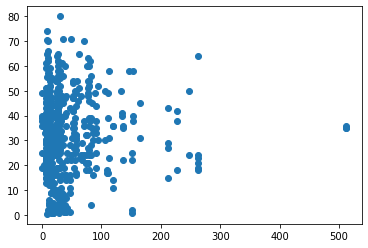

In [ ]:
titanic=pd.read_csv('titanic.csv')
cluster_data = titanic[['Fare','Age']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)
cluster_data.sort_values(by=['Fare','Age'], inplace=True)
cluster_array = np.array(cluster_data)
print(cluster_data.head())
plt.scatter(cluster_array[:,0],cluster_array[:,1])

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


se intenta hacer un cluster de 2 para agrupar a la gente del titanic

[[ 25.41562456  29.55919118]
 [220.27230294  32.49764706]]


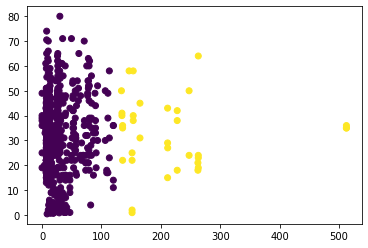

In [ ]:
KM=KMeans(n_clusters=2)
y_pred=KM.fit_predict(cluster_array)
plt.scatter(cluster_array[:,0],cluster_array[:,1],c=y_pred)
print(KM.cluster_centers_)

magnitudes entre edad y precio de pasaje son muy diferentes, de ahi que hay aque normalizar los datos; cluster ha marcado la magnitud mas grande

## Normalizar los datos

Entre los diferentes tipos de normalización de los valores de los datos que podemos hacer están:

- Escalado frente al máximo : $x'=\frac{x}{max(|X|)}$
- Normalización entre el mínimo y máximo: $x'=\frac{x-x_{min}}{x_{max}-x_{min}}$
- Estandarización. Siendo $\mu_x$, $\sigma_x$  la media de y desviación estandar de  X: $x_{std}=\frac{x-\mu}{\sigma}$

preproccesing que tiene paquetes de librerias para escalar

### **Escalado con el máximo**

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
# creamos el objeto an abs_scaler
abs_scaler = MaxAbsScaler()
abs_scaler.fit(cluster_array)

MaxAbsScaler()

In [ ]:
# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_

array([512.3292,  80.    ])

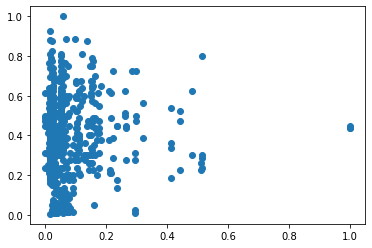

In [ ]:
#Escalamos los datos
scaled_data = abs_scaler.transform(cluster_array)
plt.scatter(scaled_data[:,0],scaled_data[:,1])

[[0.05516694 0.26432925]
 [0.09031322 0.56367647]]


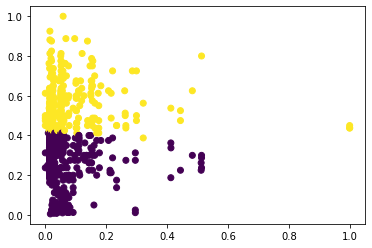

In [ ]:
KM=KMeans(n_clusters=2)
y_pred=KM.fit_predict(scaled_data)
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=y_pred)
print(KM.cluster_centers_)

In [ ]:
abs_scaler.inverse_transform(KM.cluster_centers_)

array([[28.26363377, 21.14633987],
       [46.27009843, 45.09411765]])

ahora nos lo divide por la edad

### Mínimo-Maximo

otro tipo de escala

ahora se importa escala de minimo maximo

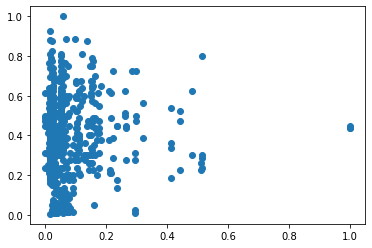

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# creamos el objeto an abs_scaler
scaler = MinMaxScaler()
scaler.fit(cluster_array)
#Escalamos los datos
scaled_data = abs_scaler.transform(cluster_array)
plt.scatter(scaled_data[:,0],scaled_data[:,1])

[[0.05516694 0.26432925]
 [0.09031322 0.56367647]]


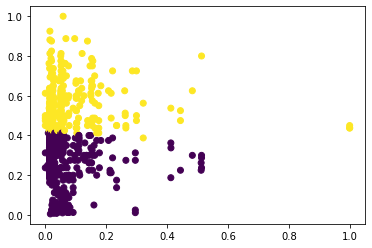

In [ ]:
KM=KMeans(n_clusters=2)
y_pred=KM.fit_predict(scaled_data)
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=y_pred)
print(KM.cluster_centers_)

In [ ]:
scaler.inverse_transform(KM.cluster_centers_)

array([[28.26363377, 21.45532158],
       [46.27009843, 45.27737353]])

### Estandarizar

esta es la normalizacion estandard

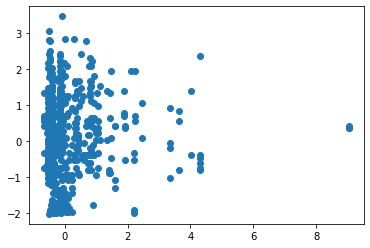

In [ ]:
from sklearn.preprocessing import StandardScaler
# creamos el objeto an abs_scaler
standar = StandardScaler()
standar.fit(cluster_array)
#Escalamos los datos
scaled_data = standar.transform(cluster_array)
plt.scatter(scaled_data[:,0],scaled_data[:,1])

media es 0 en la grafica y desviacion tipa 1

es la mejor

[[ 0.58580614  1.09913715]
 [-0.26088533 -0.48949428]]


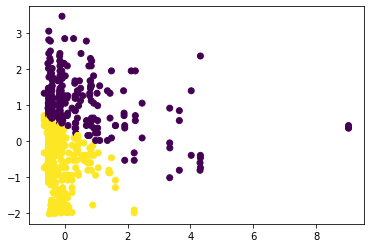

In [ ]:
KM=KMeans(n_clusters=2)
y_pred=KM.fit_predict(scaled_data)
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=y_pred)
print(KM.cluster_centers_)

In [ ]:
scaler.inverse_transform(KM.cluster_centers_)

array([[ 300.12559093,   87.88933412],
       [-133.65917005,  -38.53395447]])

## Flores Iris

este data set esta dentro esta incluido por lo que se impora online

y es tipo de florecita

x variables

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X, y = datasets.load_iris(return_X_y=True)

.fit significa que le aplicas el ajuste a la salida de kamenas

In [ ]:
KM = KMeans(n_clusters=3, random_state=1).fit(X)

centroides

In [ ]:
KM.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

valor de inercia, es el valor medio de compagidad de los elementos

In [ ]:
KM.inertia_

78.851441426146

#Calidad de la partición. Coeficiente [**Silhouette**](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation).

EL coefiente de  **Silhouette** está definido para cada ejemplo y consta de dos mediadas:

- **a:** La media de la distancia entre un punto y **todos los puntos de su grupo**; cuanto mas pequeña mejor
- **b:** La media de la distancia entre un punto y **todos los puntos de su grupo más cercano** distinto al suyo; cuanto mas alto mejor, porque mas diferencia respecto a otros grupos

Despues se normaliza

el coeficiente para un punto simple se calcula como: $s=\frac{b-a}{max(a,b)}$

El coeficiente global se calcula como la media de los coeficientes de cada punto.

**Cuanto mayor es el valor del coefiente mejor es la agrupación**

para ver cuantos cluster

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)

Un uso normal del coeficiente de **Silhouette**

Indicamos nosotros el numero de cluster; vamos variando para ver si sube la distancia o no sube

Inercia siempre va aumentando el numero de clase,

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.5528190123564095

# visualización

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 
         'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=cols)

In [ ]:
y=data['Class']
X=data.loc[:,'Alcohol':]

## Por piezas en dos dimensiones

distribucion de los vinos respecto a la clase y flavanoids

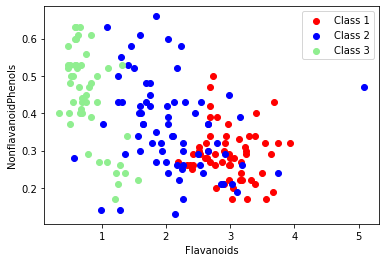

In [ ]:
# three different scatter series so the class labels in the legend are distinct
plt.scatter(X[y==1]['Flavanoids'], X[y==1]['NonflavanoidPhenols'], label='Class 1', c='red')
plt.scatter(X[y==2]['Flavanoids'], X[y==2]['NonflavanoidPhenols'], label='Class 2', c='blue')
plt.scatter(X[y==3]['Flavanoids'], X[y==3]['NonflavanoidPhenols'], label='Class 3', c='lightgreen')

# Prettify the graph
plt.legend()
plt.xlabel('Flavanoids')
plt.ylabel('NonflavanoidPhenols')

# display
plt.show()

## Reducción de la dimensionalidad

### Algoritmo **PCA**

Para reducir dimensiones

PCA = principales componentes

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import MinMaxScaler
# creamos el objeto an abs_scaler
scaler = MinMaxScaler()
scaler.fit(X)
X_norm=scaler.transform(X)

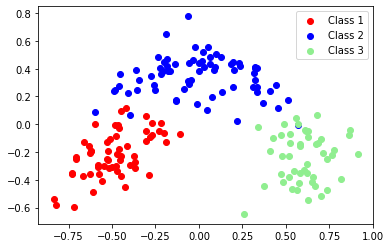

In [ ]:
pca = sklearnPCA(n_components=2) #2 dimensiones lda
transformed = pd.DataFrame(pca.fit_transform(X_norm,y))
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')

plt.legend()
plt.show()

Problemas para explicar un cluster

### Algoritmo **LDA**

LDA = analisis discriminante lineal

clasificación y reducción de dimensión

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler
# creamos el objeto an abs_scaler
scaler = MinMaxScaler()
scaler.fit(X)
X_norm=scaler.transform(X)

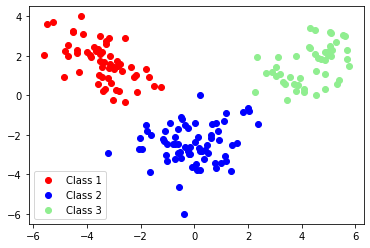

In [ ]:
lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X_norm, y))

# Plot all three series
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==3][0], lda_transformed[y==3][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()